In [1]:
import numpy as np
import pandas as pd
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch .cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [3]:
df = pd.read_csv(r"C:\Users\rohan\Desktop\college\dl_che\Adsorption_Data.csv")
df.head()

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383


In [4]:
class NeuralNetwork (nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,15),
            nn.ReLU(),
            nn.Linear(15,5),
            nn.ReLU(),
            nn.Linear(5,1)
           

        )

    def forward (self ,x_tensor):
        logits=self.linear_relu_stack(x_tensor)
        return logits
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [5]:
x=df.drop(columns=['Adorption Capacity(output)'])
#y =df.iloc[:,-1]
y=df.drop(columns=['C(x1)',	'H(x2)'	,'N(x3)'	,'Si(x4)',	'BET(x5)'])
#y=reshape(47840,1, keepdims=True)
print(x.shape)
print(y.shape)


(35, 5)
(35, 1)


In [6]:
x_tensor=torch.tensor(x.values,dtype=torch.float32)
y_tensor=torch.tensor(y.values,dtype=torch.float32)
#y_tensor.unsqueeze(1)
#y_tensor.reshape(47840,1,keepdims)
print(y_tensor.shape)
dataset=TensorDataset(x_tensor,y_tensor)


num_samples = len(dataset)
indices = list(range(num_samples))
split = int(num_samples * 0.8) 
train_indices, val_indices = indices[:split], indices[split:]
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=1, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=1, sampler=val_sampler)

torch.Size([35, 1])


In [7]:
loss_fn=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=1e-3)

In [8]:
def train (dataloader , model  ,loss_fn , optimizer):
    size=len(dataloader.dataset)
    model.train()
    for batch ,(x,y)in enumerate(dataloader):
        x,y=x.to(device), y.to(device)

        pred=model(x)
        loss=loss_fn(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch %100==0:
            loss,current=loss.item(),(batch+1)*len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [9]:
def test (dataloader , model , loss_fn):
    size = len(dataloader.dataset)
    num_batches=len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x_tensor, y_tensor in dataloader:
            x_tensor, y_tensor = x_tensor.to(device), y_tensor.to(device)
            pred = model(x_tensor)
            test_loss += loss_fn(pred, y_tensor).item()
            #correct += (pred.argmax(1) == y_tensor).type(torch.float).sum().item()
    test_loss /= num_batches*35
    correct /= size
    print(f"Test Error: \n  Avg loss: {test_loss:>8f} \n")

In [10]:
epochs = 200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(val_loader, model, loss_fn)
print("ok")

Epoch 1
-------------------------------
loss: 17.939661  [    1/   35]
Test Error: 
  Avg loss: 5.018958 

Epoch 2
-------------------------------
loss: 0.147593  [    1/   35]
Test Error: 
  Avg loss: 4.895964 

Epoch 3
-------------------------------
loss: 2.986737  [    1/   35]
Test Error: 
  Avg loss: 4.861968 

Epoch 4
-------------------------------
loss: 4.173656  [    1/   35]
Test Error: 
  Avg loss: 4.852198 

Epoch 5
-------------------------------
loss: 0.012147  [    1/   35]
Test Error: 
  Avg loss: 4.844779 

Epoch 6
-------------------------------
loss: 8.032231  [    1/   35]
Test Error: 
  Avg loss: 4.838225 

Epoch 7
-------------------------------
loss: 10.492722  [    1/   35]
Test Error: 
  Avg loss: 4.833714 

Epoch 8
-------------------------------
loss: 7.880250  [    1/   35]
Test Error: 
  Avg loss: 4.828822 

Epoch 9
-------------------------------
loss: 378.432373  [    1/   35]
Test Error: 
  Avg loss: 4.823729 

Epoch 10
-------------------------------
l

                               C(x1)     H(x2)     N(x3)    Si(x4)   BET(x5)  \
C(x1)                       1.000000  0.661529  0.132219 -0.580041  0.440584   
H(x2)                       0.661529  1.000000  0.014156 -0.380672  0.163708   
N(x3)                       0.132219  0.014156  1.000000 -0.157786 -0.316263   
Si(x4)                     -0.580041 -0.380672 -0.157786  1.000000 -0.179075   
BET(x5)                     0.440584  0.163708 -0.316263 -0.179075  1.000000   
Adorption Capacity(output)  0.270624  0.001367 -0.186562 -0.092483  0.787414   

                            Adorption Capacity(output)  
C(x1)                                         0.270624  
H(x2)                                         0.001367  
N(x3)                                        -0.186562  
Si(x4)                                       -0.092483  
BET(x5)                                       0.787414  
Adorption Capacity(output)                    1.000000  


<AxesSubplot:>

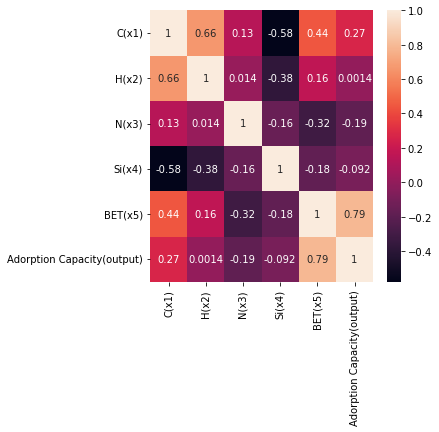

In [11]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)


In [21]:
k=df.drop(columns=['H(x2)'	,'N(x3)'	,'Si(x4)',	'BET(x5)','Adorption Capacity(output)'])


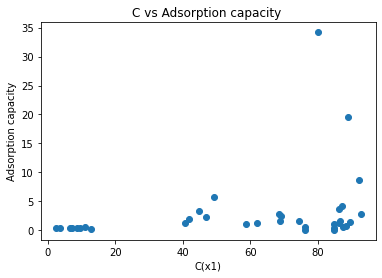

In [22]:
fig, ax = plt.subplots()
k=df.drop(columns=['H(x2)'	,'N(x3)'	,'Si(x4)',	'BET(x5)','Adorption Capacity(output)'])
ax.plot(k['C(x1)'], y['Adorption Capacity(output)'], 'o')


# Set the title and axis labels
ax.set_title('C vs Adsorption capacity ')
ax.set_xlabel('C(x1)')
ax.set_ylabel('Adsorption capacity')

# Show the plot
plt.show()


In [ ]:
#similarly ith other parameters